Synthetic dataset created and saved as C:\Users\ASUS\PycharmProjects\P1\P1\synthetic_dataset.csv.
Shape of reduced data: (1000, 10)


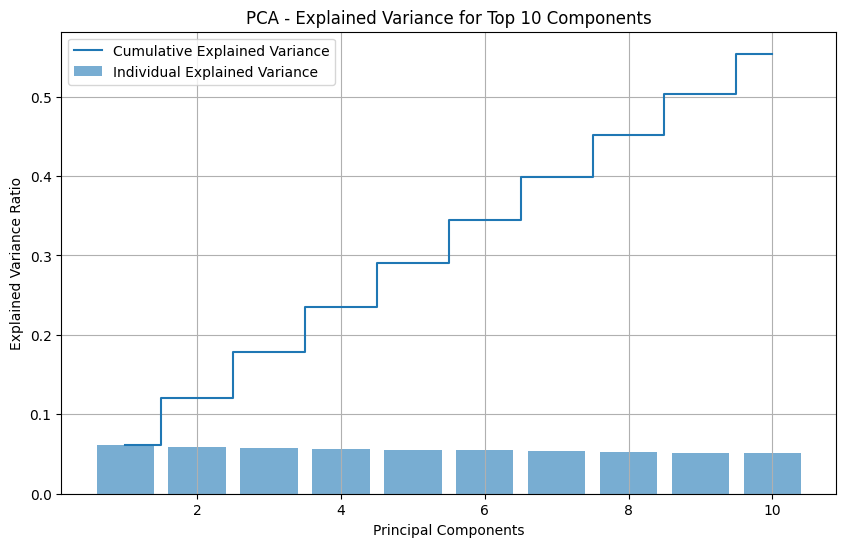

Accuracy of SVM on test data: 0.55


In [2]:
#support vector machine

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic data
# 1000 samples, 20 features
X = np.random.randn(1000, 20)

# Step 2: Generate synthetic labels (binary classification)
# Label 0 or 1 for SVM classification
y = np.random.randint(0, 2, 1000)

# Step 3: Create a DataFrame and save it as CSV
data = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(20)])
data['Target'] = y

# Save the dataset to your desired path
csv_path = r"C:\Users\ASUS\PycharmProjects\P1\P1\synthetic_dataset.csv"
data.to_csv(csv_path, index=False)

print(f"Synthetic dataset created and saved as {csv_path}.")

# Step 4: Load the dataset from the path
data = pd.read_csv(csv_path)

# Step 5: Separate features and target
X = data.drop('Target', axis=1)  # Features
y = data['Target']  # Target labels

# Step 6: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # We want the top 10 principal components
X_reduced = pca.fit_transform(X_scaled)

print("Shape of reduced data:", X_reduced.shape)

# Step 8: Visualize explained variance of each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance, alpha=0.6, label='Individual Explained Variance')
plt.step(range(1, 11), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance for Top 10 Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Step 9: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Step 10: Train an SVM classifier on the reduced data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 11: Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of SVM on test data: {accuracy:.2f}")
